## Part 1: Reading in the Yelp Reviews

- "corpus" = collection of documents
- "corpora" = plural form of corpus

In [5]:
#import required packages
#basics
import pandas as pd 
import numpy as np

#misc
import gc
import time
import warnings

#stats
#from scipy.misc import imread
from scipy import sparse
import scipy.stats as ss

#viz
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
import seaborn as sns
from wordcloud import WordCloud ,STOPWORDS
from PIL import Image

In [6]:
#nlp
import string
import re    #for regex
import nltk

In [7]:
from nltk.corpus import stopwords

In [8]:
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize


In [9]:
# Tweet tokenizer does not split at apostophes which is what we want
from nltk.tokenize import TweetTokenizer 

In [11]:

#FeatureEngineering
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer, TfidfTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_is_fitted
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm, decomposition, ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

import  textblob
from textblob import TextBlob

In [15]:
from nltk.stem import PorterStemmer
import nltk

from textblob import Word


In [79]:


#settings
start_time=time.time()
color = sns.color_palette()
# sns.set_style("dark")
eng_stopwords = set(stopwords.words("english"))
warnings.filterwarnings("ignore")

lem = WordNetLemmatizer()
tokenizer=TweetTokenizer()

# %matplotlib inline

In [ ]:
# obj3ctive is to use tect to predict reatings 

In [18]:
# read yelp.csv into a DataFrame
yelp = pd.read_csv('C:/Users/tejan/Desktop/Data Analystics/class work/python stats class 21 (Text Mining)/text_mning/Text Mining case study - Yelp Reveiws/reviews.csv')

In [20]:
yelp.head(5)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [21]:
yelp=yelp[['review_id', 'stars', 'text', 'cool', 'useful', 'funny']]

In [22]:
yelp.head()

,review_id,stars,text,cool,useful,funny
0,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,2,5,0
1,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,0,0,0
2,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,0,1,0
3,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",1,2,0
4,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,0,0,0


In [23]:
df = yelp

### Basic Exploratory Analysis

#### Note: It may take some time to process the function if the data is huge

In [70]:
df['text'] = df['text'].astype(str)
df['count_sent']=df["text"].apply(lambda x: len(re.findall("\n",str(x)))+1)

#Word count in each comment:
df['count_word']=df["text"].apply(lambda x: len(str(x).split()))

#Unique word count
df['count_unique_word']=df["text"].apply(lambda x: len(set(str(x).split())))

#Letter count
df['count_letters']=df["text"].apply(lambda x: len(str(x)))

#Word density

df['word_density'] = df['count_letters'] / (df['count_word']+1)

In [71]:
df.head()

,review_id,stars,text,cool,useful,funny,count_sent,count_word,count_unique_word,count_letters,word_density
0,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,2,5,0,7,155,110,889,5.698718
1,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,0,0,0,5,257,159,1345,5.213178
2,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,0,1,0,1,16,16,76,4.470588
3,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",1,2,0,5,76,61,419,5.441558
4,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,0,0,0,3,86,72,469,5.390805


In [37]:
df.text.count()

10000

In [ ]:
#Word count in each comment:
df['count_word']=df["text"].apply(lambda x: len(str(x).split()))

In [ ]:
#punctuation count
df["count_punctuations"] =df["text"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

In [63]:
df["text"].apply(lambda x: len())

In [80]:
df['text'] = df['text'].astype(str)
df['count_sent']=df["text"].apply(lambda x: len(re.findall("\n",str(x)))+1)

#Word count in each comment:
df['count_word']=df["text"].apply(lambda x: len(str(x).split()))

#Unique word count
df['count_unique_word']=df["text"].apply(lambda x: len(set(str(x).split())))

#Letter count
df['count_letters']=df["text"].apply(lambda x: len(str(x)))

#Word density
df['word_density'] = df['count_letters'] / (df['count_word']+1)

#punctuation count
df["count_punctuations"] =df["text"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

#upper case words count
df["count_words_upper"] = df["text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

#upper case words count
df["count_words_lower"] = df["text"].apply(lambda x: len([w for w in str(x).split() if w.islower()]))

#title case words count
df["count_words_title"] = df["text"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

Number of stopwords
df["count_stopwords"] = df["text"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))

#Average length of the words
df["mean_word_len"] = df["text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

#Number of numeric
df['numeric'] = df['text'].apply(lambda x :len([x for x in x.split() if x.isdigit()]))

#Number of alphanumeric
df['alphanumeric'] = df['text'].apply(lambda x :len([x for x in x.split() if x.isalnum()]))

#Number of alphabetics
df['alphabetetics'] = df['text'].apply(lambda x :len([x for x in x.split() if x.isalpha()]))

#Number of alphabetics
df['Spaces'] = df['text'].apply(lambda x :len([x for x in x.split() if x.isspace()]))

#Number of Words ends with
df['words_ends_with_et'] = df['text'].apply(lambda x :len([x for x in x.lower().split() if x.endswith('et')]))

#Number of Words ends with
df['words_start_with_no'] = df['text'].apply(lambda x :len([x for x in x.lower().split() if x.startswith('no')]))

# Count the occurences of all words
df['wordcounts'] = df['text'].apply(lambda x :dict([ [t, x.split().count(t)] for t in set(x.split()) ]))

pos_family = {
    'noun' : ['NN','NNS','NNP','NNPS'],
    'pron' : ['PRP','PRP$','WP','WP$'],
    'verb' : ['VB','VBD','VBG','VBN','VBP','VBZ'],
    'adj' :  ['JJ','JJR','JJS'],
    'adv' : ['RB','RBR','RBS','WRB']
}

# function to check and get the part of speech tag count of a words in a given sentence
def check_pos_tag(x, flag):
    cnt = 0
    try:
        wiki = textblob.TextBlob(x)
        for tup in wiki.tags:
            ppo = list(tup)[1]
            if ppo in pos_family[flag]:
                cnt += 1
    except:
        pass
    return cnt

df['noun_count'] = df['text'].apply(lambda x: check_pos_tag(x, 'noun'))
df['verb_count'] = df['text'].apply(lambda x: check_pos_tag(x, 'verb'))
df['adj_count']  = df['text'].apply(lambda x: check_pos_tag(x, 'adj'))
df['adv_count']  = df['text'].apply(lambda x: check_pos_tag(x, 'adv'))
df['pron_count'] = df['text'].apply(lambda x: check_pos_tag(x, 'pron')) 

### Calculating Sentiment analysis using Textblob module

In [12]:
df['sentiment'] = df["text"].apply(lambda x: TextBlob(x).sentiment.polarity )

In [132]:
TextBlob(yelp.text[0]).sentiment

Sentiment(polarity=0.40246913580246907, subjectivity=0.6591122868900646)

In [115]:
yelp.stars.value_counts()

4    3526
5    3337
3    1461
2     927
1     749
Name: stars, dtype: int64

### Split the data into train & Test

In [81]:
# create a new DataFrame that only contains the 5-star and 1-star reviews
#yelp_best_worst = yelp[(yelp.stars==5) | (yelp.stars==1)]

# define X and y
X = yelp.text
y = yelp.stars

# split the new DataFrame into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7500,)
(2500,)
(7500,)
(2500,)


In [82]:
yelp.shape

(10000, 28)

### Creating user defined functions for clean the text and pre-process the data

In [84]:
#Abbrevations and Words correction
def clean_text(text):
    text = text.lower()
    text = text.strip()
    text = re.sub(r' +', ' ', text)
    text = re.sub(r"[-()\"#/@;:{}`+=~|.!?,'0-9]", "", text)
    return(text)

In [120]:
# import nltk
# nltk.download('stopwords')

In [89]:
stop = set(nltk.corpus.stopwords.words('english'))

In [92]:
import string
def pre_process(text):
    #text = text.str.replace('/','')                           #Replacing the / with none
    #text = text.apply(lambda x: re.sub("  "," ", x))          #Replacing double space with single space
    #text = re.sub(r"[-()\"#/@;:{}`+=~|.!?,']", "", text)      #Replacing special character with none
    #text = re.sub(r'[0-9]+', '', text)                        #Replacing numbers with none
    #text = text.apply(lambda x: " ".join(x.translate(str.maketrans('', '', string.punctuation)) for x in x.split() if x.isalpha()))
    text = text.apply(lambda x: " ".join(x for x in x.split() if x not in stop)) #Removing stop words
    #text = text.apply(lambda x: str(TextBlob(x).correct()))                      #Correct spelling corrections
    #text = text.apply(lambda x: " ".join(PorterStemmer().stem(word) for word in x.split())) #Stemming using porter stemmer
    #text = text.apply(lambda x: " ".join(stemmer_func(word) for word in x.split()))        #Stemming
    #text = text.apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))   #lemmatization
    text = text.apply(lambda x: " ".join(word for word, pos in pos_tag(x.split()) if pos not in ['NN','NNS','NNP','NNPS'])) #Removing nouns etc
    return(text)

In [93]:
X_train = X_train.apply(lambda x: clean_text(x))
X_test = X_test.apply(lambda x: clean_text(x))

In [94]:
X_train=pre_process(X_train)
X_test=pre_process(X_test)

### Vectorization (Count, Tfidf, Hashing)
        - Charter level
        - Word level
        - n-grams

In [19]:
CountVectorizer?

In [99]:
#Train
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ), 
                             min_df=5, 
                             encoding='latin-1' ,
                             max_features=800)
xtrain_count = count_vect.fit_transform(X_train)


In [100]:
xtrain_count

<7500x800 sparse matrix of type '<class 'numpy.int64'>'
	with 262248 stored elements in Compressed Sparse Row format>

### View the document term metrics

In [101]:
dtm=xtrain_count.toarray()

In [102]:
dtm

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [138]:
count_vect.get_feature_names()

In [104]:
dtm1=pd.DataFrame(dtm)

In [105]:
dtm1.columns=count_vect.get_feature_names()

In [109]:
dtm1.head()

,able,absolutely,across,actually,add,added,afternoon,ago,almost,along,...,year,years,yelp,yes,yet,youll,youre,youve,yum,yummy
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


### Vectorization (count, tfidf) for both train & test

In [110]:
#Train
count_vect = CountVectorizer(analyzer='word', 
                             token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ), 
                             min_df=5, 
                             encoding='latin-1' , 
                             max_features=800)
xtrain_count = count_vect.fit_transform(X_train)

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(xtrain_count)

#Test
#count_vect = CountVectorizer()
xtest_count = count_vect.transform(X_test)

#tfidf_transformer = TfidfTransformer()
X_test_tfidf = tfidf_transformer.transform(xtest_count)


In [111]:
dtm2=pd.DataFrame(X_train_tfidf.toarray(), columns=count_vect.get_feature_names())

In [114]:
round(dtm2.head(10),1)

,able,absolutely,across,actually,add,added,afternoon,ago,almost,along,...,year,years,yelp,yes,yet,youll,youre,youve,yum,yummy
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.2,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.1,...,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.1,0.0,0.0,0.1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern='\w{1,}', ngram_range=(1, 2), max_features=800)
tfidf_vect_ngram.fit(df['text'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(X_train)
xtest_tfidf_ngram =  tfidf_vect_ngram.transform(X_test)

In [33]:
# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern='\w{1,}', ngram_range=(1,2), max_features=800)
tfidf_vect_ngram_chars.fit(df['text'])
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(X_train) 
xtest_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(X_test)

### Topic Modeling

In [134]:
# train a LDA Model
lda_model = decomposition.LatentDirichletAllocation(n_components=20, learning_method='batch', max_iter=50)
X_topics = lda_model.fit_transform(X_train_tfidf)
topic_word = lda_model.components_ 
vocab = count_vect.get_feature_names()

In [135]:
# view the topic models
n_top_words = 10
topic_summaries = []
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    topic_summaries.append(' '.join(topic_words))

topic_summaries

['reason needed great special another ago star even years got',
 'great food service good friendly staff love clean prices place',
 'sushi happy hour roll best rolls love amazing tuna great',
 'good food place ordered chicken salad great like really cheese',
 'burger fries burgers potato sweet bbq crispy expensive toppings cheese',
 'market wow drive company special fast buy business stop order',
 'yum need say money value low cheap free taking totally',
 'great coffee place hotel pool room nice good movie area',
 'place like get one time good go great dont really',
 'beer bar sports watch game music crowd wings fun great',
 'great wine food amazing place happy service atmosphere nice patio',
 'thai phone curry priced noodles dish call way four wont',
 'pizza crust wings best pie slices salads thin sausage ive',
 'closed guys loved fair girls location place beautiful looks recently',
 'pho spring rolls mexican noodles home quick food bowl tasty',
 'food good place mexican tacos great l

### Yelp data - Word clouds

In [39]:
frequency_words_wo_stop= {}
for data in yelp['text']:
    tokens = nltk.wordpunct_tokenize(data.lower())
    for token in tokens:
        if token.lower() not in stop:
            if token in frequency_words_wo_stop:
                count = frequency_words_wo_stop[token]
                count = count + 1
                frequency_words_wo_stop[token] = count
            else:
                frequency_words_wo_stop[token] = 1
                

In [121]:
frequency_words_wo_stop

In [48]:
from wordcloud import WordCloud ,STOPWORDS

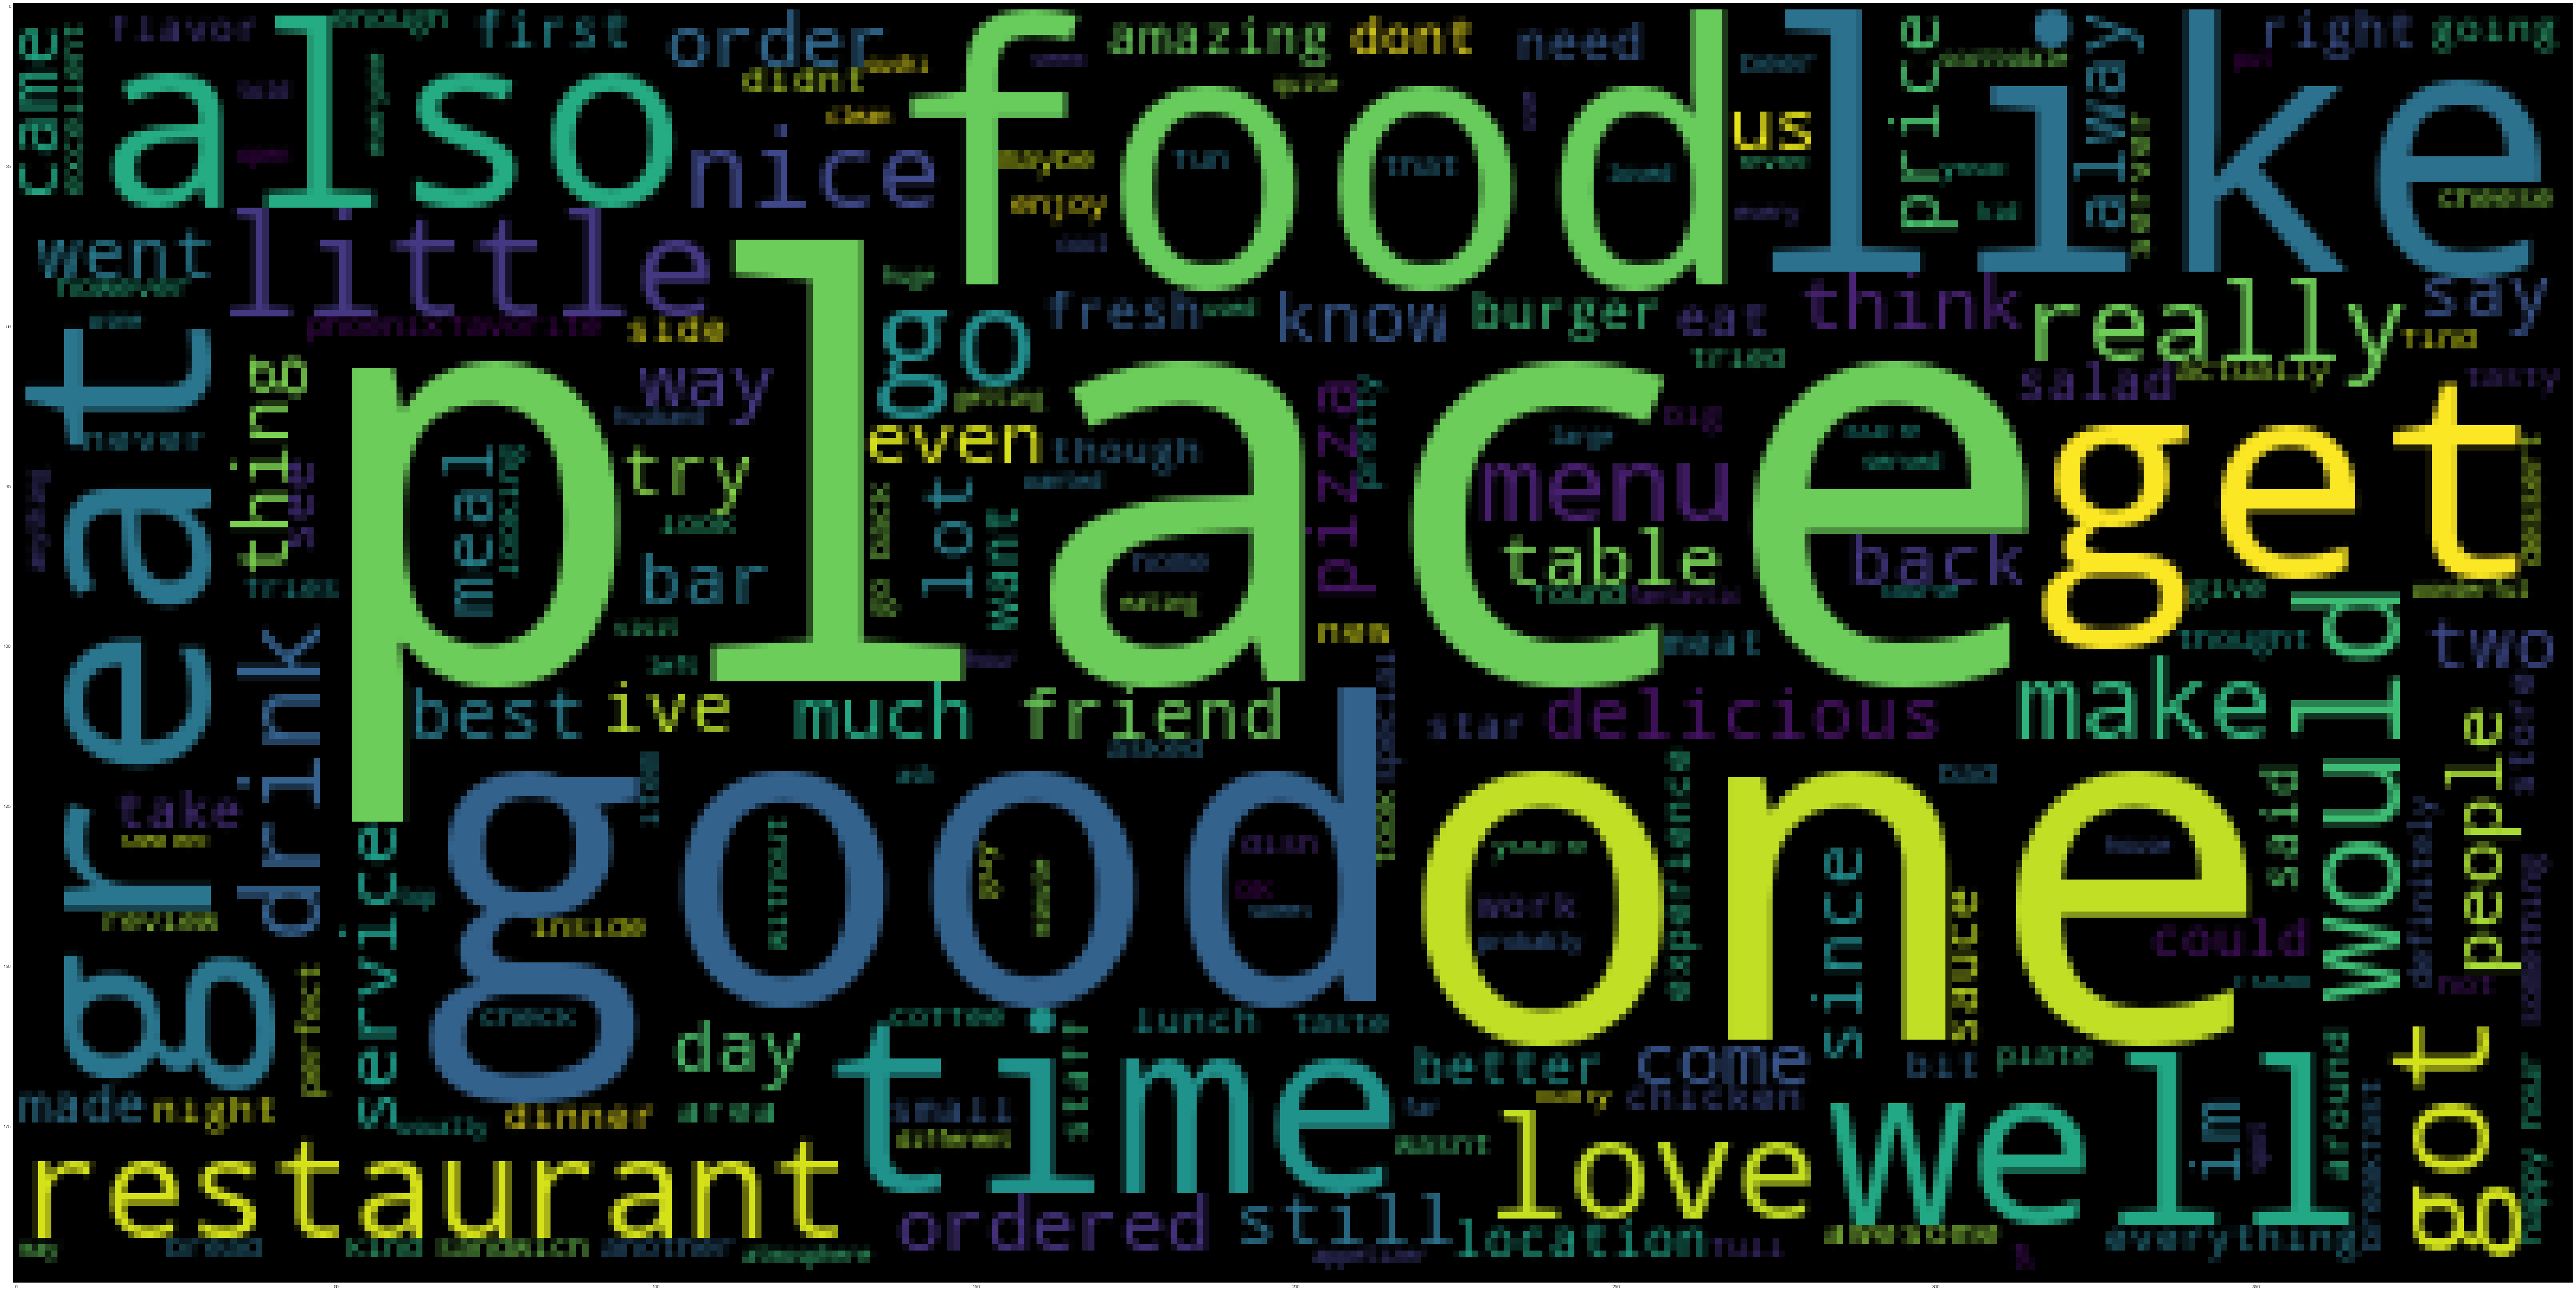

In [41]:
wordcloud = WordCloud(stopwords=[]).generate(' '.join(X_train.tolist()))

%matplotlib inline
fig = plt.figure(figsize=(200,50))
plt.imshow(wordcloud)

### Create user defined function for train the models

In [43]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid,  valid_y, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    return metrics.accuracy_score(predictions, valid_y)

### Building different models with different vectors

In [44]:
#Naive Bayes
# Naive Bayes on Count Vectors and TF-IDF
accuracy_L1 = train_model(naive_bayes.MultinomialNB(), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("NB  for L1, Count Vectors: ", accuracy_L1)


NB  for L1, Count Vectors:  0.4736


In [45]:
# Naive Bayes on Word Level TF Vectors
accuracy_L1 = train_model(naive_bayes.MultinomialNB(), xtrain_count, y_train, xtest_count, y_test)
print("NB  for L1, WordLevel TF: ", accuracy_L1)

NB  for L1, WordLevel TF-IDF:  0.508


In [46]:
# Naive Bayes on Ngram Level TF IDF Vectors
accuracy_L1 = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram, y_test)
print("NB  for L1, N-Gram Vectors: ", accuracy_L1)



# Naive Bayes on Character Level TF IDF Vectors
accuracy_L1 = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram_chars, y_train, xtest_tfidf_ngram_chars, y_test)
print("NB for L1, CharLevel Vectors: ", accuracy_L1)



NB  for L1, N-Gram Vectors:  0.4512
NB for L1, CharLevel Vectors:  0.4028


In [47]:
#Logistic Regression
# Logistic Regression on Count Vectors and TF-IDF
accuracy_L1 = train_model(LogisticRegression(), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("LR  for L1, Count Vectors: ", accuracy_L1)



# Logistic Regression on Word Level TF Vectors
accuracy_L1 = train_model(LogisticRegression(), xtrain_count, y_train, xtest_count, y_test)
print("LR  for L1, WordLevel TF-IDF: ", accuracy_L1)



# Logistic Regression on Ngram Level TF IDF Vectors
accuracy_L1 = train_model(LogisticRegression(), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram, y_test)
print("LR  for L1, N-Gram Vectors: ", accuracy_L1)



# Logistic Regression on Character Level TF IDF Vectors
accuracy_L1 = train_model(LogisticRegression(), xtrain_tfidf_ngram_chars, y_train, xtest_tfidf_ngram_chars, y_test)
print("LR for L1, CharLevel Vectors: ", accuracy_L1)

LR  for L1, Count Vectors:  0.5164
LR  for L1, WordLevel TF-IDF:  0.4824
LR  for L1, N-Gram Vectors:  0.4988
LR for L1, CharLevel Vectors:  0.4324


In [48]:
#Linear SVC
# Linear SVC on Count Vectors and TF-IDF
accuracy_L1 = train_model(svm.LinearSVC(), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("SVC  for L1, Count Vectors: ", accuracy_L1)



# Linear SVC on Word Level TF Vectors
accuracy_L1 = train_model(svm.LinearSVC(), xtrain_count, y_train, xtest_count, y_test)
print("SVC  for L1, WordLevel TF-IDF: ", accuracy_L1)



# Linear SVC on Ngram Level TF IDF Vectors
accuracy_L1 = train_model(svm.LinearSVC(), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram, y_test)
print("SVC  for L1, N-Gram Vectors: ", accuracy_L1)



# Linear SVC on Character Level TF IDF Vectors
accuracy_L1 = train_model(svm.LinearSVC(), xtrain_tfidf_ngram_chars, y_train, xtest_tfidf_ngram_chars, y_test)
print("SVC for L1, CharLevel Vectors: ", accuracy_L1)

SVC  for L1, Count Vectors:  0.4976
SVC  for L1, WordLevel TF-IDF:  0.482
SVC  for L1, N-Gram Vectors:  0.4976
SVC for L1, CharLevel Vectors:  0.4608


### Adding Features to a Document-Term Matrix

In [123]:
# create a DataFrame that only contains the 5-star and 1-star reviews
yelp = yelp[(yelp.stars==5) | (yelp.stars==1)]

# define X and y
feature_cols = ['text', 'sentiment', 'cool', 'useful', 'funny']
X = yelp[feature_cols]
y = yelp.stars

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [80]:
TfidfVectorizer?

In [50]:
# use CountVectorizer with text column only
vect = TfidfVectorizer(lowercase=True, stop_words='english', max_features=1000, min_df=5, ngram_range=(1, 2))
X_train_dtm = vect.fit_transform(X_train.text)
X_test_dtm = vect.transform(X_test.text)
print(X_train_dtm.shape)
print(X_test_dtm.shape)

# shape of other four feature columns
X_train.drop('text', axis=1).shape

(3064, 1000)
(1022, 1000)


(3064, 4)

In [54]:
# use CountVectorizer with text column only
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train.text)
X_test_dtm = vect.transform(X_test.text)
print(X_train_dtm.shape)
print(X_test_dtm.shape)

# shape of other four feature columns
X_train.drop('text', axis=1).shape

(3064, 16825)
(1022, 16825)


(3064, 4)

In [55]:
# cast other feature columns to float and convert to a sparse matrix
extra = sparse.csr_matrix(X_train.drop('text', axis=1).astype(float))
extra.shape

# combine sparse matrices
X_train_dtm_extra = sparse.hstack((X_train_dtm, extra))
X_train_dtm_extra.shape

# repeat for testing set
extra = sparse.csr_matrix(X_test.drop('text', axis=1).astype(float))
X_test_dtm_extra = sparse.hstack((X_test_dtm, extra))
X_test_dtm_extra.shape

(1022, 16829)

In [56]:
# use logistic regression with text column only
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train_dtm, y_train)
y_pred_class = logreg.predict(X_test_dtm)
print(metrics.accuracy_score(y_test, y_pred_class))

0.9178082191780822


In [57]:
# use logistic regression with all features
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train_dtm_extra, y_train)
y_pred_class = logreg.predict(X_test_dtm_extra)
print(metrics.accuracy_score(y_test, y_pred_class))

0.9227005870841487


### Basic to additional TextBlob features

TextBlob: "Simplified Text Processing"

In [61]:
print(yelp.text[1])

I have no idea why some people give bad reviews about this place. It goes to show you, you can please everyone. They are probably griping about something that their own fault...there are many people like that.

In any case, my friend and I arrived at about 5:50 PM this past Sunday. It was pretty crowded, more than I thought for a Sunday evening and thought we would have to wait forever to get a seat but they said we'll be seated when the girl comes back from seating someone else. We were seated at 5:52 and the waiter came and got our drink orders. Everyone was very pleasant from the host that seated us to the waiter to the server. The prices were very good as well. We placed our orders once we decided what we wanted at 6:02. We shared the baked spaghetti calzone and the small "Here's The Beef" pizza so we can both try them. The calzone was huge and we got the smallest one (personal) and got the small 11" pizza. Both were awesome! My friend liked the pizza better and I liked the calzone

In [141]:
# print the first review
print(yelp.text[0])

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!


In [125]:
# save it as a TextBlob object
review = TextBlob(yelp.text[1])
review1 = TextBlob('Good food, like it, excellent and recommended')
review1

TextBlob("Good food, like it, excellent and recommended")

In [126]:
review.sentiment

Sentiment(polarity=0.22977272727272727, subjectivity=0.6384848484848485)

In [127]:
print(dir(review))

['__add__', '__class__', '__contains__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_cmpkey', '_compare', '_create_sentence_objects', '_strkey', 'analyzer', 'classifier', 'classify', 'correct', 'detect_language', 'ends_with', 'endswith', 'find', 'format', 'index', 'join', 'json', 'lower', 'ngrams', 'noun_phrases', 'np_counts', 'np_extractor', 'parse', 'parser', 'polarity', 'pos_tagger', 'pos_tags', 'raw', 'raw_sentences', 'replace', 'rfind', 'rindex', 'sentences', 'sentiment', 'sentiment_assessments', 'serialized', 'split', 'starts_with', 'startswith', 'string', 'strip', 'stripped', 'subjectivity', 'tags', 'title', 'to_json', 'tokenize', 'tokenizer', 'tokens', 'tra

In [128]:
print(review.ngrams(1))

[WordList(['I']), WordList(['have']), WordList(['no']), WordList(['idea']), WordList(['why']), WordList(['some']), WordList(['people']), WordList(['give']), WordList(['bad']), WordList(['reviews']), WordList(['about']), WordList(['this']), WordList(['place']), WordList(['It']), WordList(['goes']), WordList(['to']), WordList(['show']), WordList(['you']), WordList(['you']), WordList(['can']), WordList(['please']), WordList(['everyone']), WordList(['They']), WordList(['are']), WordList(['probably']), WordList(['griping']), WordList(['about']), WordList(['something']), WordList(['that']), WordList(['their']), WordList(['own']), WordList(['fault']), WordList(['there']), WordList(['are']), WordList(['many']), WordList(['people']), WordList(['like']), WordList(['that']), WordList(['In']), WordList(['any']), WordList(['case']), WordList(['my']), WordList(['friend']), WordList(['and']), WordList(['I']), WordList(['arrived']), WordList(['at']), WordList(['about']), WordList(['5:50']), WordList([

In [129]:
review.sentiment

Sentiment(polarity=0.22977272727272727, subjectivity=0.6384848484848485)

In [5]:
# list the words
review.words

WordList(['I', 'have', 'no', 'idea', 'why', 'some', 'people', 'give', 'bad', 'reviews', 'about', 'this', 'place', 'It', 'goes', 'to', 'show', 'you', 'you', 'can', 'please', 'everyone', 'They', 'are', 'probably', 'griping', 'about', 'something', 'that', 'their', 'own', 'fault', 'there', 'are', 'many', 'people', 'like', 'that', 'In', 'any', 'case', 'my', 'friend', 'and', 'I', 'arrived', 'at', 'about', '5:50', 'PM', 'this', 'past', 'Sunday', 'It', 'was', 'pretty', 'crowded', 'more', 'than', 'I', 'thought', 'for', 'a', 'Sunday', 'evening', 'and', 'thought', 'we', 'would', 'have', 'to', 'wait', 'forever', 'to', 'get', 'a', 'seat', 'but', 'they', 'said', 'we', "'ll", 'be', 'seated', 'when', 'the', 'girl', 'comes', 'back', 'from', 'seating', 'someone', 'else', 'We', 'were', 'seated', 'at', '5:52', 'and', 'the', 'waiter', 'came', 'and', 'got', 'our', 'drink', 'orders', 'Everyone', 'was', 'very', 'pleasant', 'from', 'the', 'host', 'that', 'seated', 'us', 'to', 'the', 'waiter', 'to', 'the', 'ser

In [80]:
# list the sentences
review.sentences

[Sentence("I have no idea why some people give bad reviews about this place."),
 Sentence("It goes to show you, you can please everyone."),
 Sentence("They are probably griping about something that their own fault...there are many people like that."),
 Sentence("In any case, my friend and I arrived at about 5:50 PM this past Sunday."),
 Sentence("It was pretty crowded, more than I thought for a Sunday evening and thought we would have to wait forever to get a seat but they said we'll be seated when the girl comes back from seating someone else."),
 Sentence("We were seated at 5:52 and the waiter came and got our drink orders."),
 Sentence("Everyone was very pleasant from the host that seated us to the waiter to the server."),
 Sentence("The prices were very good as well."),
 Sentence("We placed our orders once we decided what we wanted at 6:02."),
 Sentence("We shared the baked spaghetti calzone and the small "Here's The Beef" pizza so we can both try them."),
 Sentence("The calzone wa

In [81]:
# some string methods are available
review.lower()

TextBlob("i have no idea why some people give bad reviews about this place. it goes to show you, you can please everyone. they are probably griping about something that their own fault...there are many people like that.

in any case, my friend and i arrived at about 5:50 pm this past sunday. it was pretty crowded, more than i thought for a sunday evening and thought we would have to wait forever to get a seat but they said we'll be seated when the girl comes back from seating someone else. we were seated at 5:52 and the waiter came and got our drink orders. everyone was very pleasant from the host that seated us to the waiter to the server. the prices were very good as well. we placed our orders once we decided what we wanted at 6:02. we shared the baked spaghetti calzone and the small "here's the beef" pizza so we can both try them. the calzone was huge and we got the smallest one (personal) and got the small 11" pizza. both were awesome! my friend liked the pizza better and i liked t

In [82]:
review.ngrams(n=2)

[WordList(['I', 'have']),
 WordList(['have', 'no']),
 WordList(['no', 'idea']),
 WordList(['idea', 'why']),
 WordList(['why', 'some']),
 WordList(['some', 'people']),
 WordList(['people', 'give']),
 WordList(['give', 'bad']),
 WordList(['bad', 'reviews']),
 WordList(['reviews', 'about']),
 WordList(['about', 'this']),
 WordList(['this', 'place']),
 WordList(['place', 'It']),
 WordList(['It', 'goes']),
 WordList(['goes', 'to']),
 WordList(['to', 'show']),
 WordList(['show', 'you']),
 WordList(['you', 'you']),
 WordList(['you', 'can']),
 WordList(['can', 'please']),
 WordList(['please', 'everyone']),
 WordList(['everyone', 'They']),
 WordList(['They', 'are']),
 WordList(['are', 'probably']),
 WordList(['probably', 'griping']),
 WordList(['griping', 'about']),
 WordList(['about', 'something']),
 WordList(['something', 'that']),
 WordList(['that', 'their']),
 WordList(['their', 'own']),
 WordList(['own', 'fault']),
 WordList(['fault', 'there']),
 WordList(['there', 'are']),
 WordList(['are

## Language correction, detection, translation etc...

In [84]:
# spelling correction
TextBlob('15 minuets late').correct()

TextBlob("15 minutes late")

In [85]:
s="this is my email adcresc"

In [86]:
TextBlob(s).correct()

TextBlob("this is my email address")

In [87]:
# spellcheck
Word('parot').spellcheck()

[('part', 0.9929478138222849), ('parrot', 0.007052186177715092)]

In [89]:
# definitions
Word('bank').define('n')

['sloping land (especially the slope beside a body of water)',
 'a financial institution that accepts deposits and channels the money into lending activities',
 'a long ridge or pile',
 'an arrangement of similar objects in a row or in tiers',
 'a supply or stock held in reserve for future use (especially in emergencies)',
 'the funds held by a gambling house or the dealer in some gambling games',
 'a slope in the turn of a road or track; the outside is higher than the inside in order to reduce the effects of centrifugal force',
 'a container (usually with a slot in the top) for keeping money at home',
 'a building in which the business of banking transacted',
 'a flight maneuver; aircraft tips laterally about its longitudinal axis (especially in turning)']

In [90]:
# language detection
TextBlob('టీమిండియా మాజీ ఓపెనర్‌ గౌతమ్ గంభీర్ మంగళవారం క్రికెట్‌కు రిటైర్‌మెంట్ ప్రకటించారు. దానిపై స్పందించిన బాలీవుడ్ స్టార్‌ షారుక్‌ ఖాన్‌ ఓ ట్వీట్ చేశారు').detect_language()

'te'

In [92]:
# Language Translation
a=' '.join(TextBlob('టీమిండియా మాజీ ఓపెనర్‌ గౌతమ్ గంభీర్ మంగళవారం క్రికెట్‌కు రిటైర్‌మెంట్ ప్రకటించారు. దానిపై స్పందించిన బాలీవుడ్ స్టార్‌ షారుక్‌ ఖాన్‌ ఓ ట్వీట్ చేశారు').translate(to='en').words)

print(a)

Former India opener Gautam Gambhir announced his retirement from cricket on Tuesday Bollywood star Shah Rukh Khan tweeted


## Stemming and Lemmatization

**Stemming:**

- **What:** Reduce a word to its base/stem/root form
- **Why:** Often makes sense to treat related words the same way
- **Notes:**
    - Uses a "simple" and fast rule-based approach
    - Stemmed words are usually not shown to users (used for analysis/indexing)
    - Some search engines treat words with the same stem as synonyms

In [7]:
# initialize stemmer
stemmer = nltk.stem.snowball.SnowballStemmer('english')
stemmer

In [6]:
review.words

WordList(['I', 'have', 'no', 'idea', 'why', 'some', 'people', 'give', 'bad', 'reviews', 'about', 'this', 'place', 'It', 'goes', 'to', 'show', 'you', 'you', 'can', 'please', 'everyone', 'They', 'are', 'probably', 'griping', 'about', 'something', 'that', 'their', 'own', 'fault', 'there', 'are', 'many', 'people', 'like', 'that', 'In', 'any', 'case', 'my', 'friend', 'and', 'I', 'arrived', 'at', 'about', '5:50', 'PM', 'this', 'past', 'Sunday', 'It', 'was', 'pretty', 'crowded', 'more', 'than', 'I', 'thought', 'for', 'a', 'Sunday', 'evening', 'and', 'thought', 'we', 'would', 'have', 'to', 'wait', 'forever', 'to', 'get', 'a', 'seat', 'but', 'they', 'said', 'we', "'ll", 'be', 'seated', 'when', 'the', 'girl', 'comes', 'back', 'from', 'seating', 'someone', 'else', 'We', 'were', 'seated', 'at', '5:52', 'and', 'the', 'waiter', 'came', 'and', 'got', 'our', 'drink', 'orders', 'Everyone', 'was', 'very', 'pleasant', 'from', 'the', 'host', 'that', 'seated', 'us', 'to', 'the', 'waiter', 'to', 'the', 'ser

In [8]:
# stem each word
print([stemmer.stem(word) for word in review.words])

['i', 'have', 'no', 'idea', 'whi', 'some', 'peopl', 'give', 'bad', 'review', 'about', 'this', 'place', 'it', 'goe', 'to', 'show', 'you', 'you', 'can', 'pleas', 'everyon', 'they', 'are', 'probabl', 'gripe', 'about', 'someth', 'that', 'their', 'own', 'fault', 'there', 'are', 'mani', 'peopl', 'like', 'that', 'in', 'ani', 'case', 'my', 'friend', 'and', 'i', 'arriv', 'at', 'about', '5:50', 'pm', 'this', 'past', 'sunday', 'it', 'was', 'pretti', 'crowd', 'more', 'than', 'i', 'thought', 'for', 'a', 'sunday', 'even', 'and', 'thought', 'we', 'would', 'have', 'to', 'wait', 'forev', 'to', 'get', 'a', 'seat', 'but', 'they', 'said', 'we', 'll', 'be', 'seat', 'when', 'the', 'girl', 'come', 'back', 'from', 'seat', 'someon', 'els', 'we', 'were', 'seat', 'at', '5:52', 'and', 'the', 'waiter', 'came', 'and', 'got', 'our', 'drink', 'order', 'everyon', 'was', 'veri', 'pleasant', 'from', 'the', 'host', 'that', 'seat', 'us', 'to', 'the', 'waiter', 'to', 'the', 'server', 'the', 'price', 'were', 'veri', 'good',

**Lemmatization**

- **What:** Derive the canonical form ('lemma') of a word
- **Why:** Can be better than stemming
- **Notes:** Uses a dictionary-based approach (slower than stemming)

In [9]:
review.words

WordList(['I', 'have', 'no', 'idea', 'why', 'some', 'people', 'give', 'bad', 'reviews', 'about', 'this', 'place', 'It', 'goes', 'to', 'show', 'you', 'you', 'can', 'please', 'everyone', 'They', 'are', 'probably', 'griping', 'about', 'something', 'that', 'their', 'own', 'fault', 'there', 'are', 'many', 'people', 'like', 'that', 'In', 'any', 'case', 'my', 'friend', 'and', 'I', 'arrived', 'at', 'about', '5:50', 'PM', 'this', 'past', 'Sunday', 'It', 'was', 'pretty', 'crowded', 'more', 'than', 'I', 'thought', 'for', 'a', 'Sunday', 'evening', 'and', 'thought', 'we', 'would', 'have', 'to', 'wait', 'forever', 'to', 'get', 'a', 'seat', 'but', 'they', 'said', 'we', "'ll", 'be', 'seated', 'when', 'the', 'girl', 'comes', 'back', 'from', 'seating', 'someone', 'else', 'We', 'were', 'seated', 'at', '5:52', 'and', 'the', 'waiter', 'came', 'and', 'got', 'our', 'drink', 'orders', 'Everyone', 'was', 'very', 'pleasant', 'from', 'the', 'host', 'that', 'seated', 'us', 'to', 'the', 'waiter', 'to', 'the', 'ser

In [10]:
# assume every word is a noun
print([word.lemmatize() for word in review.words])

['I', 'have', 'no', 'idea', 'why', 'some', 'people', 'give', 'bad', 'review', 'about', 'this', 'place', 'It', 'go', 'to', 'show', 'you', 'you', 'can', 'please', 'everyone', 'They', 'are', 'probably', 'griping', 'about', 'something', 'that', 'their', 'own', 'fault', 'there', 'are', 'many', 'people', 'like', 'that', 'In', 'any', 'case', 'my', 'friend', 'and', 'I', 'arrived', 'at', 'about', '5:50', 'PM', 'this', 'past', 'Sunday', 'It', 'wa', 'pretty', 'crowded', 'more', 'than', 'I', 'thought', 'for', 'a', 'Sunday', 'evening', 'and', 'thought', 'we', 'would', 'have', 'to', 'wait', 'forever', 'to', 'get', 'a', 'seat', 'but', 'they', 'said', 'we', "'ll", 'be', 'seated', 'when', 'the', 'girl', 'come', 'back', 'from', 'seating', 'someone', 'else', 'We', 'were', 'seated', 'at', '5:52', 'and', 'the', 'waiter', 'came', 'and', 'got', 'our', 'drink', 'order', 'Everyone', 'wa', 'very', 'pleasant', 'from', 'the', 'host', 'that', 'seated', 'u', 'to', 'the', 'waiter', 'to', 'the', 'server', 'The', 'pri

In [11]:
# assume every word is a verb
print([word.lemmatize(pos='v') for word in review.words])

['I', 'have', 'no', 'idea', 'why', 'some', 'people', 'give', 'bad', 'review', 'about', 'this', 'place', 'It', 'go', 'to', 'show', 'you', 'you', 'can', 'please', 'everyone', 'They', 'be', 'probably', 'grip', 'about', 'something', 'that', 'their', 'own', 'fault', 'there', 'be', 'many', 'people', 'like', 'that', 'In', 'any', 'case', 'my', 'friend', 'and', 'I', 'arrive', 'at', 'about', '5:50', 'PM', 'this', 'past', 'Sunday', 'It', 'be', 'pretty', 'crowd', 'more', 'than', 'I', 'think', 'for', 'a', 'Sunday', 'even', 'and', 'think', 'we', 'would', 'have', 'to', 'wait', 'forever', 'to', 'get', 'a', 'seat', 'but', 'they', 'say', 'we', "'ll", 'be', 'seat', 'when', 'the', 'girl', 'come', 'back', 'from', 'seat', 'someone', 'else', 'We', 'be', 'seat', 'at', '5:52', 'and', 'the', 'waiter', 'come', 'and', 'get', 'our', 'drink', 'order', 'Everyone', 'be', 'very', 'pleasant', 'from', 'the', 'host', 'that', 'seat', 'us', 'to', 'the', 'waiter', 'to', 'the', 'server', 'The', 'price', 'be', 'very', 'good',

In [161]:
# define a function that accepts text and returns a list of lemmas
def split_into_lemmas(text):
    #text = unicode(text, 'utf-8').lower()
    text = text.lower()
    words = TextBlob(text).words
    return [word.lemmatize() for word in words]

In [162]:
# use split_into_lemmas as the feature extraction function (WARNING: SLOW!)
vect = CountVectorizer(analyzer=split_into_lemmas)
tokenize_test(vect)

Features:  27212
Accuracy:  0.4624


In [ ]:
# last 50 features
print(vect.get_feature_names()[-50:])